# CS 3400 Machine Learning - Lab 3: k-Nearest Neighbors
## Stuart Harley
### Introduction

KNN (k-nearest neighbors) is a non-parametric model used for either classification regression. It is able to make non-linear decision boundaries which is important when the classes cannot be separated by a line. It uses the features to represent the data as points. It then calculates the distance between the queried point and every training point and returns the label of the k-nearest points. The mode or median of these is that used to classify the queried point. KNN in mainly only used in recommendation systems today because of several weaknesses included space and time complexity.

In this lab, I will be implementing a KNN algorithm. I will then perform several experiments using this implementation. I will evaluate the model on a grid of points to visualize the learned decision boundaries. And I will explore how the k parameter affect the accuracy and decision boundaries of the model.

## Reflection Questions

### KNN Implementation (Problem 1)

1) The Big-O runtime complexity of training a KNN model is O(1). All you have to do is give the model the points and labels. It doesn't do anything with them until you actually want to predict a query point.

2) The Big-O runtime complexity of running a KNN model is O(np + klogn + k) where n is the number of reference points, p is the number of features, and k is the k-value. This simplifies to O(np).

3) KNN's weaknesses include a large runtime complexity. You can't just make a model once and then predict off of the model. You have to calculate distances between every point, every time. The also include a large space complexity. Again you can't just store the created model, you have to store the data and label for every point in the reference points. KNN is also sensitive to scaling and it has no automatic feature selection. For these reasons, it is not as widely used as other methods.

### Decision Boundaries (Problem 2)

1) For the circle data set, a linear decision boundary would not accurately classify the points, because the points form a circle, which is the exact opposite of linear. For the moon data set, it might do an ok job except for the swirl that appears in the middle because the rest is somewhat linear. It might also do ok on the rocky ridge data because the boundary is more or less linear.

2) A non-linear decision boundary means that the boundary between classes is not straight. For example, the function for a circle could be used as a non-linear decision boundary for the circle data set.

3) Non-linear decision boundaries are able to model data sets that are not able to be separated by class by a straight line. Therefore, they are able to model many more data sets. However, they are also more complicated. You need a more advanced modeling system to calculate a non-linear boundary, which is most likely more complicated to create or computationally expensive than a model that creates a linear boundary.

### Choosing an Optimal Value for k (Problem 3)

1) The value of k that gave the highest accuracy was 4.

2) For the large values of k, the accuracy plateau'd at a low point of around 78.4%. I believe this would have happened because there are more of one class of data in the set than the other. Which means, past a certain point, you will always classify a point as the class with more data points, because it is impossible to have more of the other class since there are not enough of them in the set.

3) This approach could give misleading results. Because you are only splitting the data once and using that split to test every value of k, it is possible that this split happened to allow a k value of say 11 to classify the data very well. However, a different split may allow a k value of 3 to work the best. You would need to run multiple trials of the approach for more accurate results.

4) Cross fold is considered the best practice when optimizing parameters for the reason above. It splits the data n-different ways and then you average the results so you don't end up with one weird split that allows some weird parameter to seem the best. If you run this approach multiple times, you will end up with very similar results.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from knn import KNN
from test_knn import *

### Testing knn implementation

In [2]:
!python test_knn.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


### Loading 3 data files into matrices. A circles file, a moons file, and a rocky_ridge file.

In [3]:
circles = np.loadtxt('circles.csv', delimiter=',', skiprows=1)
moons = np.loadtxt('moons.csv', delimiter=',', skiprows=1)
rocky_ridge = np.loadtxt('rocky_ridge.csv', delimiter=',', skiprows=1)

### Splitting the data into training and testing sets (with stratification). X refers to the reference points and Y refers to their output values (labels).

In [4]:
circles_train_X, circles_test_X, circles_train_Y, circles_test_Y =\
    train_test_split(circles[:,1:3], circles[:,0], stratify=circles[:,0])
moons_train_X, moons_test_X, moons_train_Y, moons_test_Y =\
    train_test_split(moons[:,1:3], moons[:,0], stratify=moons[:,0])
rocky_ridge_train_X, rocky_ridge_test_X, rocky_ridge_train_Y, rocky_ridge_test_Y =\
    train_test_split(rocky_ridge[:,1:3], rocky_ridge[:,0], stratify=rocky_ridge[:,0])

### Scaling the data in each of the data sets.

In [5]:
circles_scalar = StandardScaler()
circles_train_X = circles_scalar.fit_transform(circles_train_X)
circles_test_X = circles_scalar.transform(circles_test_X)

In [6]:
moons_scalar = StandardScaler()
moons_train_X = moons_scalar.fit_transform(moons_train_X)
moons_test_X = moons_scalar.transform(moons_test_X)

In [7]:
rocky_ridge_scalar = StandardScaler()
rocky_ridge_train_X = rocky_ridge_scalar.fit_transform(rocky_ridge_train_X)
rocky_ridge_test_X = rocky_ridge_scalar.transform(rocky_ridge_test_X)

### For each data set, fitting a KNN modelswith 3 neighbors and using the average function for aggregation.

In [8]:
circles_knn = KNN(3, 'average')
moons_knn = KNN(3, 'average')
rocky_ridge_knn = KNN(3, 'average')

In [9]:
circles_knn.fit(circles_train_X, circles_train_Y)
moons_knn.fit(moons_train_X, moons_train_Y)
rocky_ridge_knn.fit(rocky_ridge_train_X, rocky_ridge_train_Y)

### Evaluating each model for each point on a 2D grid.

In [10]:
x = np.linspace(-3, 3, 300)
xv, yv = np.meshgrid(x, x)
y = np.tile(x, 300)
x = np.repeat(x, 300)
points = np.array([x, y]).T

In [11]:
circles_values = circles_knn.predict(points)
moons_values = moons_knn.predict(points)
rocky_ridge_values = rocky_ridge_knn.predict(points)

In [12]:
circles_contours = circles_values.reshape(300, 300)
moons_contours = moons_values.reshape(300, 300)
rocky_ridge_contours = rocky_ridge_values.reshape(300, 300)

### Plotting a contour plot, and a scatter plot where points are color coded by predicted class, for each data set. This shows the decision boundaries for these knn models.

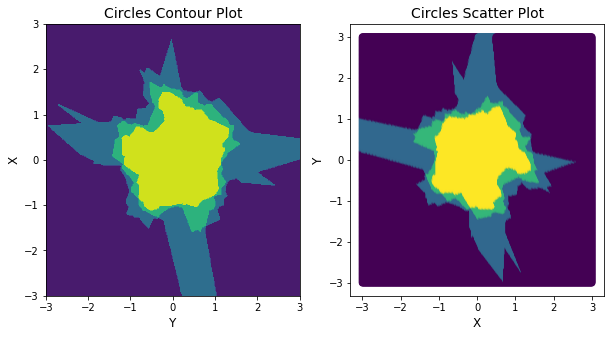

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].contourf(xv, yv, circles_contours);
axes[0].set_title('Circles Contour Plot', fontsize=14)
axes[0].set_xlabel('Y', fontsize=12)
axes[0].set_ylabel('X', fontsize=12)
axes[1].scatter(points[:,0], points[:,1], c=circles_values);
axes[1].set_title('Circles Scatter Plot', fontsize=14)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12);

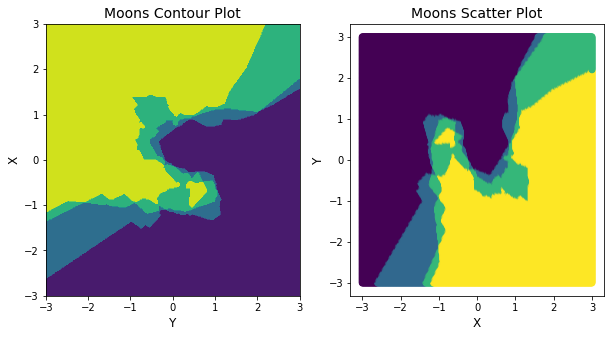

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].contourf(xv, yv, moons_contours);
axes[0].set_title('Moons Contour Plot', fontsize=14)
axes[0].set_xlabel('Y', fontsize=12)
axes[0].set_ylabel('X', fontsize=12)
axes[1].scatter(points[:,0], points[:,1], c=moons_values);
axes[1].set_title('Moons Scatter Plot', fontsize=14)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12);

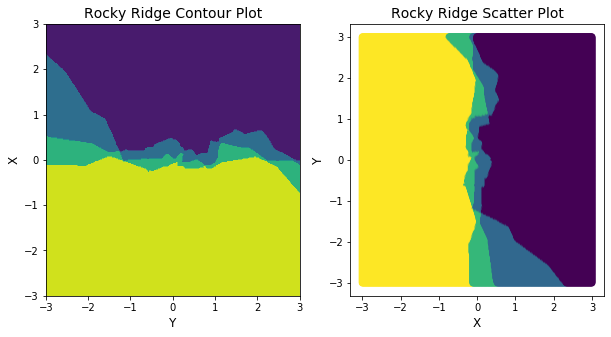

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].contourf(xv, yv, rocky_ridge_contours);
axes[0].set_title('Rocky Ridge Contour Plot', fontsize=14)
axes[0].set_xlabel('Y', fontsize=12)
axes[0].set_ylabel('X', fontsize=12)
axes[1].scatter(points[:,0], points[:,1], c=rocky_ridge_values);
axes[1].set_title('Rocky Ridge Scatter Plot', fontsize=14)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12);

### Loading a fourth data set. 'Sweep'

In [16]:
sweep = np.loadtxt('sweep.csv', delimiter=',', skiprows=1)
sweep_values = sweep[:,0]
sweep_data = sweep[:,1:3]

### Evaluating the impact of the k parameter using cross-fold validation.
For each value of k from 1 to 200, I divide the data set into 10 folds. I train the model on each combination of 9 folds and test on the remaining fold. (train 10 models per k value). I calculate the accuracies of the predictions for each model and average them to get an 1 accuracy score for each k value. I also calculate the std dev from those 10 accuracies.

In [17]:
mean_accuracies = np.zeros(200)
stds = np.zeros(200)
k = 1
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [18]:
for x in range(200):
    accuracies = np.zeros(10)
    index = 0
    for train_index, test_index in skf.split(sweep_data, sweep_values):
        sweep_knn = KNN(k, 'mode')
        sweep_knn.fit(sweep_data[train_index], sweep_values[train_index])
        sweep_predicts = sweep_knn.predict(sweep_data[test_index])
        accuracies[index] = accuracy_score(sweep_values[test_index], sweep_predicts)
        index = index + 1
    mean_accuracies[x] = np.mean(accuracies)
    stds[x] = np.std(accuracies)
    k = k + 1

### Plotting the average and std dev for each value of k

(0.7, 1)

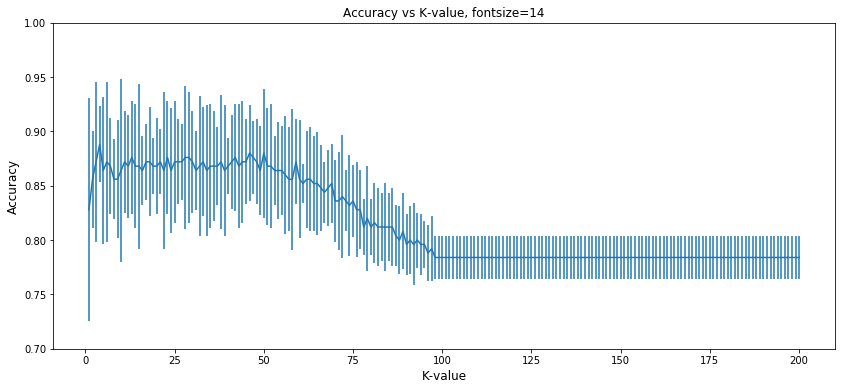

In [19]:
k_values = np.linspace(1, 200, 200)
fig, axes = plt.subplots(figsize=(14,6))
axes.errorbar(k_values, mean_accuracies, stds);
axes.set_xlabel('K-value', fontsize=12)
axes.set_ylabel('Accuracy', fontsize=12)
axes.set_title('Accuracy vs K-value, fontsize=14')
axes.set_ylim([.7, 1])